<h1><strong>Student Dropout Prediction</strong></h1>



> *Importing the required libraries*

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

> *Loading the dataset*

In [117]:
data = pd.read_excel('Project.xlsx')
data.head(10)

,Department,Gender,Mode,GPA,status
0,Medicine_and_General_Surgery,Male,Fulltime,0.1,Dropout
1,Nursing,Female,Fulltime,0.1,Dropout
2,Medical_Laboratory_Science,Male,Fulltime,0.1,Dropout
3,Medical_Laboratory_Science,Male,Fulltime,0.1,Dropout
4,Medical_Laboratory_Science,Female,Fulltime,0.1,Dropout
5,Computer_Application,Male,Fulltime,0.1,Dropout
6,Computer_Application,Male,Fulltime,0.1,Dropout
7,Computer_Application,Male,Fulltime,0.1,Dropout
8,Computer_Application,Male,Parttime,0.1,Dropout
9,Computer_Application,Male,Parttime,0.1,Dropout


## Exploratory Data Analysis

In [118]:
data.shape

(4181, 5)

From above, it is clear that the dataset contains `31` features with `395` records.

In [119]:
print('Total number of students : {}'.format(data.shape[0]))

print('Total number of students  passed: {}'.format(len(data[data.status=='no'])))

print('Total number of students  failed: {}'.format(len(data[data.status=='Dropout'])))

print('Pass percentage: {}%'.format(round(len(data[data.status=='no'])/data.shape[0],2)*100))

Total number of students : 4181
Total number of students  passed: 0
Total number of students  failed: 1443
Pass percentage: 0.0%


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Department  4181 non-null   object 
 1   Gender      4181 non-null   object 
 2   Mode        4181 non-null   object 
 3   GPA         4181 non-null   float64
 4   status      4181 non-null   object 
dtypes: float64(1), object(4)
memory usage: 163.4+ KB


*From the above output we concluded that there are no null values but there are some features that has non int values. These values have to converted to numerical categorical data.*

In [121]:
for i in data.columns:
  print(i,set(data[i].values))

Department {'Medical_Laboratory_Science', 'Accounting_and_Finance', 'Nursing', 'Medicine_and_General_Surgery', 'Banking_and_Finance', 'Electrical_and_Electronics', 'Business_Administration', 'Pharmacology', 'Computer_Application', 'Midwifery', 'Computer_Multimedia', 'Public_Health', 'Civil_Engineering', 'Public_Administration', 'Computer_Networking_and_Security', 'Economics'}
Gender {'Female', 'male', 'Male'}
Mode {'Fulltime', 'Parttime'}
GPA {0.4, 0.3, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.4, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 1.6, 2.1, 2.6, 3.1, 3.6, 1.2, 1.7, 0.1, 2.2, 2.3, 2.7, 2.8, 3.2, 3.3, 3.7, 3.8, 1.3, 1.8, 1.9, 2.4, 2.9, 3.4, 3.9}
status {'Graduated', 'Dropout'}


> *Convertion of values of Object type to Integer type:*




The above code helps us to have a glance at the unique values present in each feature of the dataset.

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# List of column names with categorical variables
objCols = ['Department', 'Gender', 'Mode','GPA','status']

# Applying label encoding to the selected columns in the 'data' DataFrame
data[objCols] = data[objCols].apply(le.fit_transform)

# Retrieving the column names of the 'data' DataFrame
feature_names = data.columns.values

# Applying label encoding to the remaining categorical columns in the 'data' DataFrame
for name in feature_names:
    if data[name].dtype == 'object':
        data[name] = le.fit_transform(data[name])

data.head()

,Department,Gender,Mode,GPA,status
0,10,1,0,0,0
1,12,0,0,0,0
2,9,1,0,0,0
3,9,1,0,0,0
4,9,0,0,0,0


*Now we find that the data set is transformed into a dataset with only integer values.*

*As we know that the model can't be trained on the categorical data, so we converted the values of object type into integer type.*

Text(0.5, 1.0, 'status?')

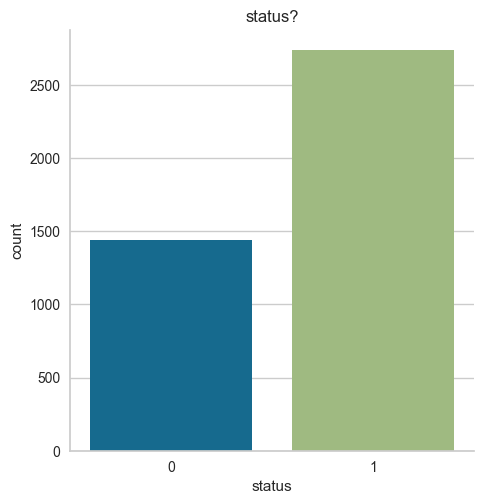

In [123]:

sns.catplot(x="status", kind="count", data=data)
plt.title('status?')

sns.countplot(x='status', data=data)
plt.title('status?')

In [124]:
data['status'].value_counts(normalize=True)

status
1    0.654867
0    0.345133
Name: proportion, dtype: float64

In [125]:
status =[data.status.value_counts()]

print("Total passed(0): {}".format(status[0][0]))
print("Pass Percentage: {}\n".format(round(status[0][0]*100/(status[0][0]+status[0][1]),2)))

print("Total Dropped Out(1): {}".format(status[0][1]))
print("Dropout Percentage Percentage: {}".format(round(status[0][1]*100/(status[0][0]+status[0][1]),2)))

Total passed(0): 1443
Pass Percentage: 34.51

Total Dropped Out(1): 2738
Dropout Percentage Percentage: 65.49


*For optimal/high accuracy, a good dataset must not contain features with high correaltion among them.
The `.corr()` method of pandas library helps us to find the co-relation among the features.*

In [126]:
corMatrix = data.corr().abs()
corMatrix

,Department,Gender,Mode,GPA,status
Department,1.000000,0.357668,0.047257,0.144759,0.168142
Gender,0.357668,1.000000,0.098882,0.120542,0.130452
Mode,0.047257,0.098882,1.000000,0.073356,0.063553
GPA,0.144759,0.120542,0.073356,1.000000,0.809153
status,0.168142,0.130452,0.063553,0.809153,1.000000


*Since the upper triangle and lower triangle matrices are same, we shall consider any one of them.*

In [127]:
upper_matrix = corMatrix.where(np.triu(np.ones(corMatrix.shape),k=1).astype(np.bool_))
upper_matrix.head()

,Department,Gender,Mode,GPA,status
Department,NaN,0.357668,0.047257,0.144759,0.168142
Gender,NaN,NaN,0.098882,0.120542,0.130452
Mode,NaN,NaN,NaN,0.073356,0.063553
GPA,NaN,NaN,NaN,NaN,0.809153
status,NaN,NaN,NaN,NaN,NaN


In [128]:
drop_columns = [col for col in upper_matrix if any(upper_matrix[col]>0.65)]
print(drop_columns)

['status']


*The features of the dataset are not highly co-related. Hence, no features are required to be removed.*

In [129]:
X = data.drop('status', axis=1)
y= data.status

In [130]:
data.corr()

,Department,Gender,Mode,GPA,status
Department,1.000000,-0.357668,0.047257,0.144759,0.168142
Gender,-0.357668,1.000000,0.098882,-0.120542,-0.130452
Mode,0.047257,0.098882,1.000000,0.073356,0.063553
GPA,0.144759,-0.120542,0.073356,1.000000,0.809153
status,0.168142,-0.130452,0.063553,0.809153,1.000000


## Data Visualization

*By using pandas, matplotlib and seaborn libraries we can visualize the data graphically and can understand more clearly.*

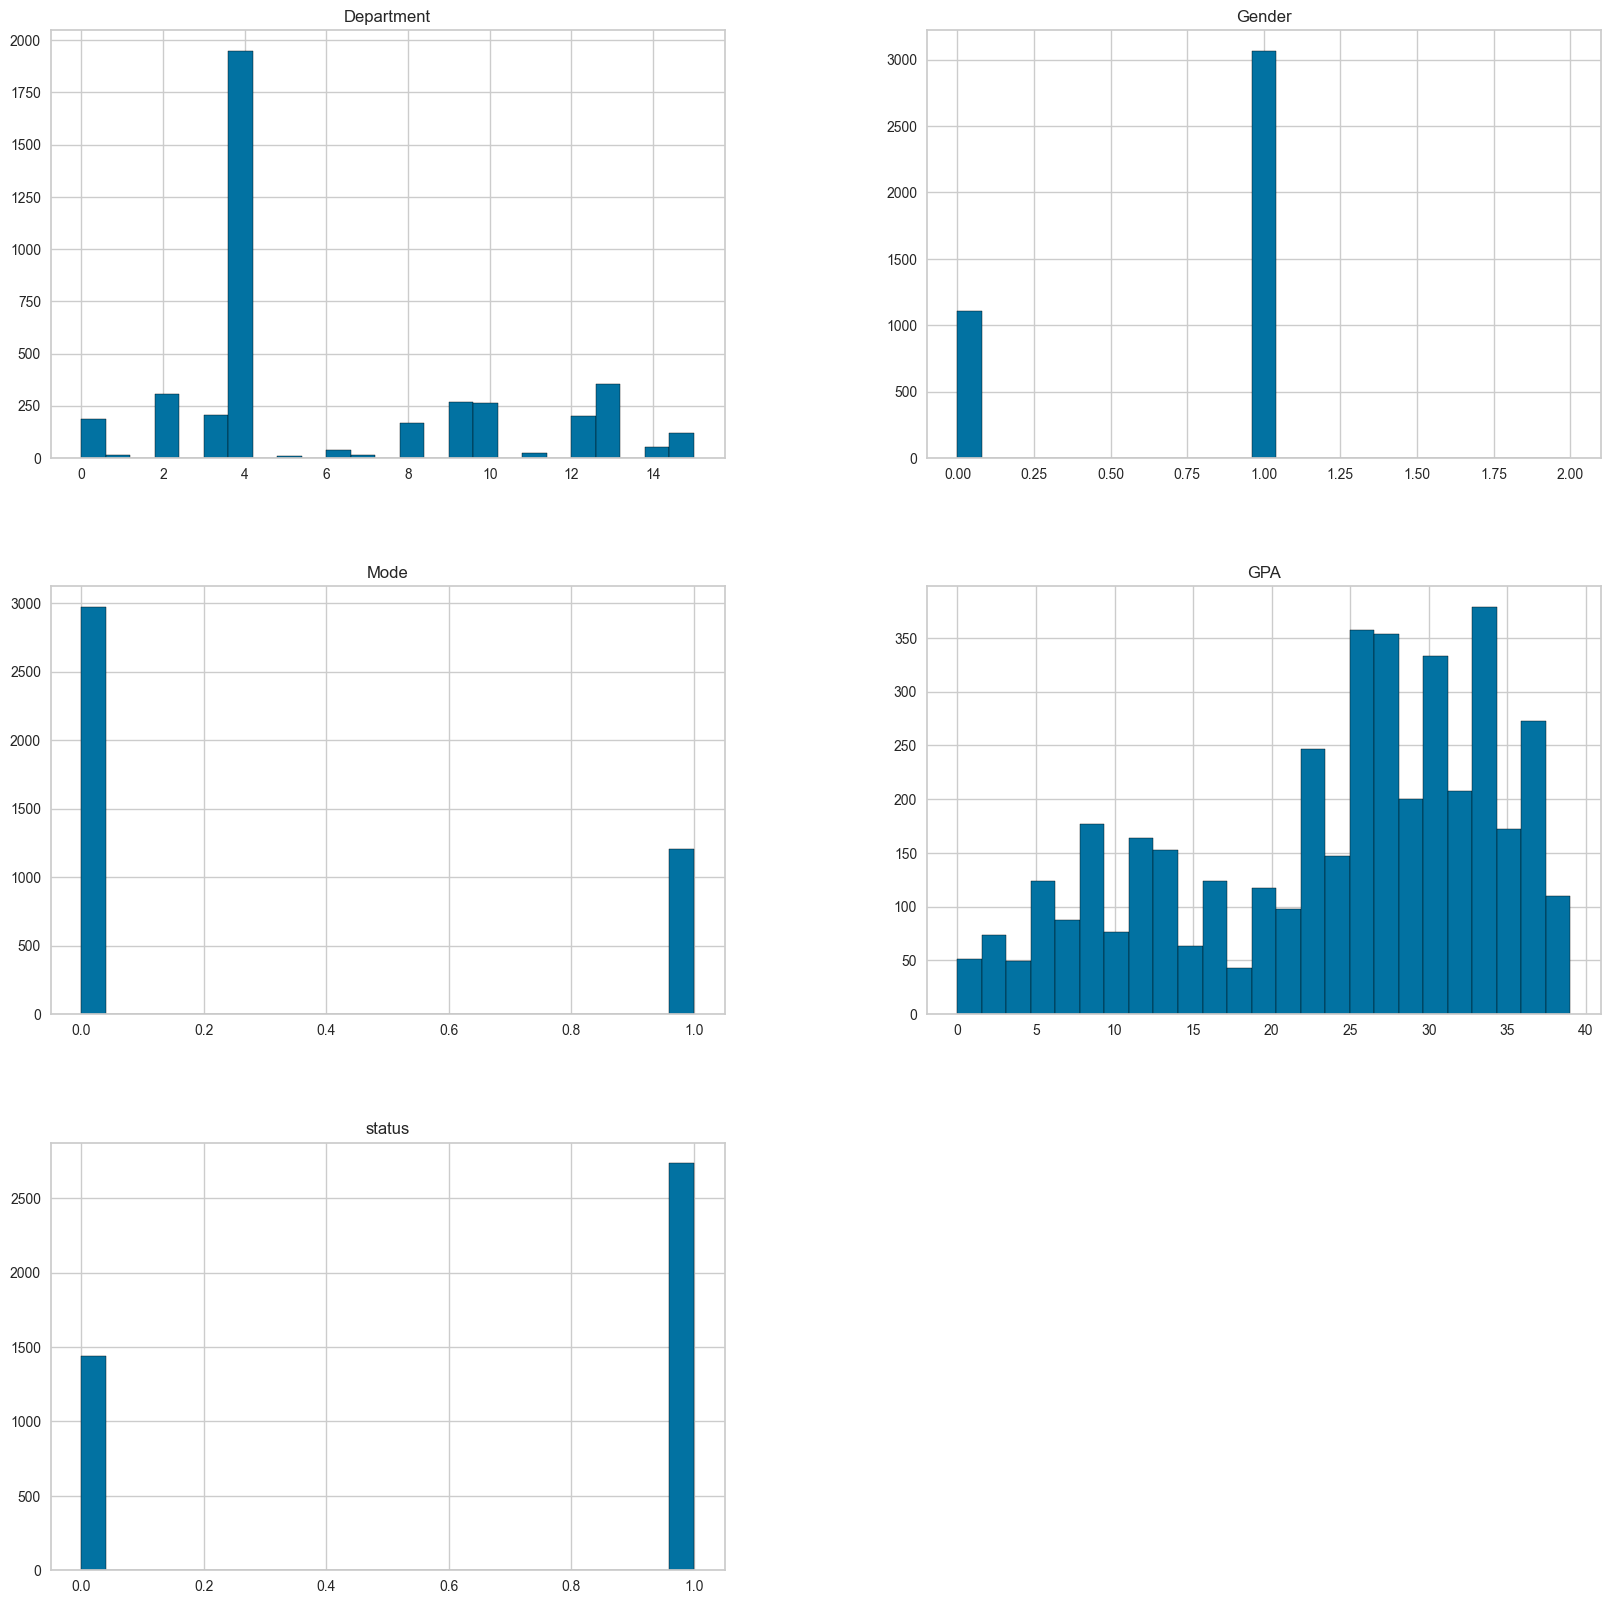

In [131]:
data.hist(edgecolor='black',bins = 25, figsize= (20,20))
plt.show()

*The `hist()` method of pandas is used to represent the histograms of each feature specified in the data frame.*

<Axes: >

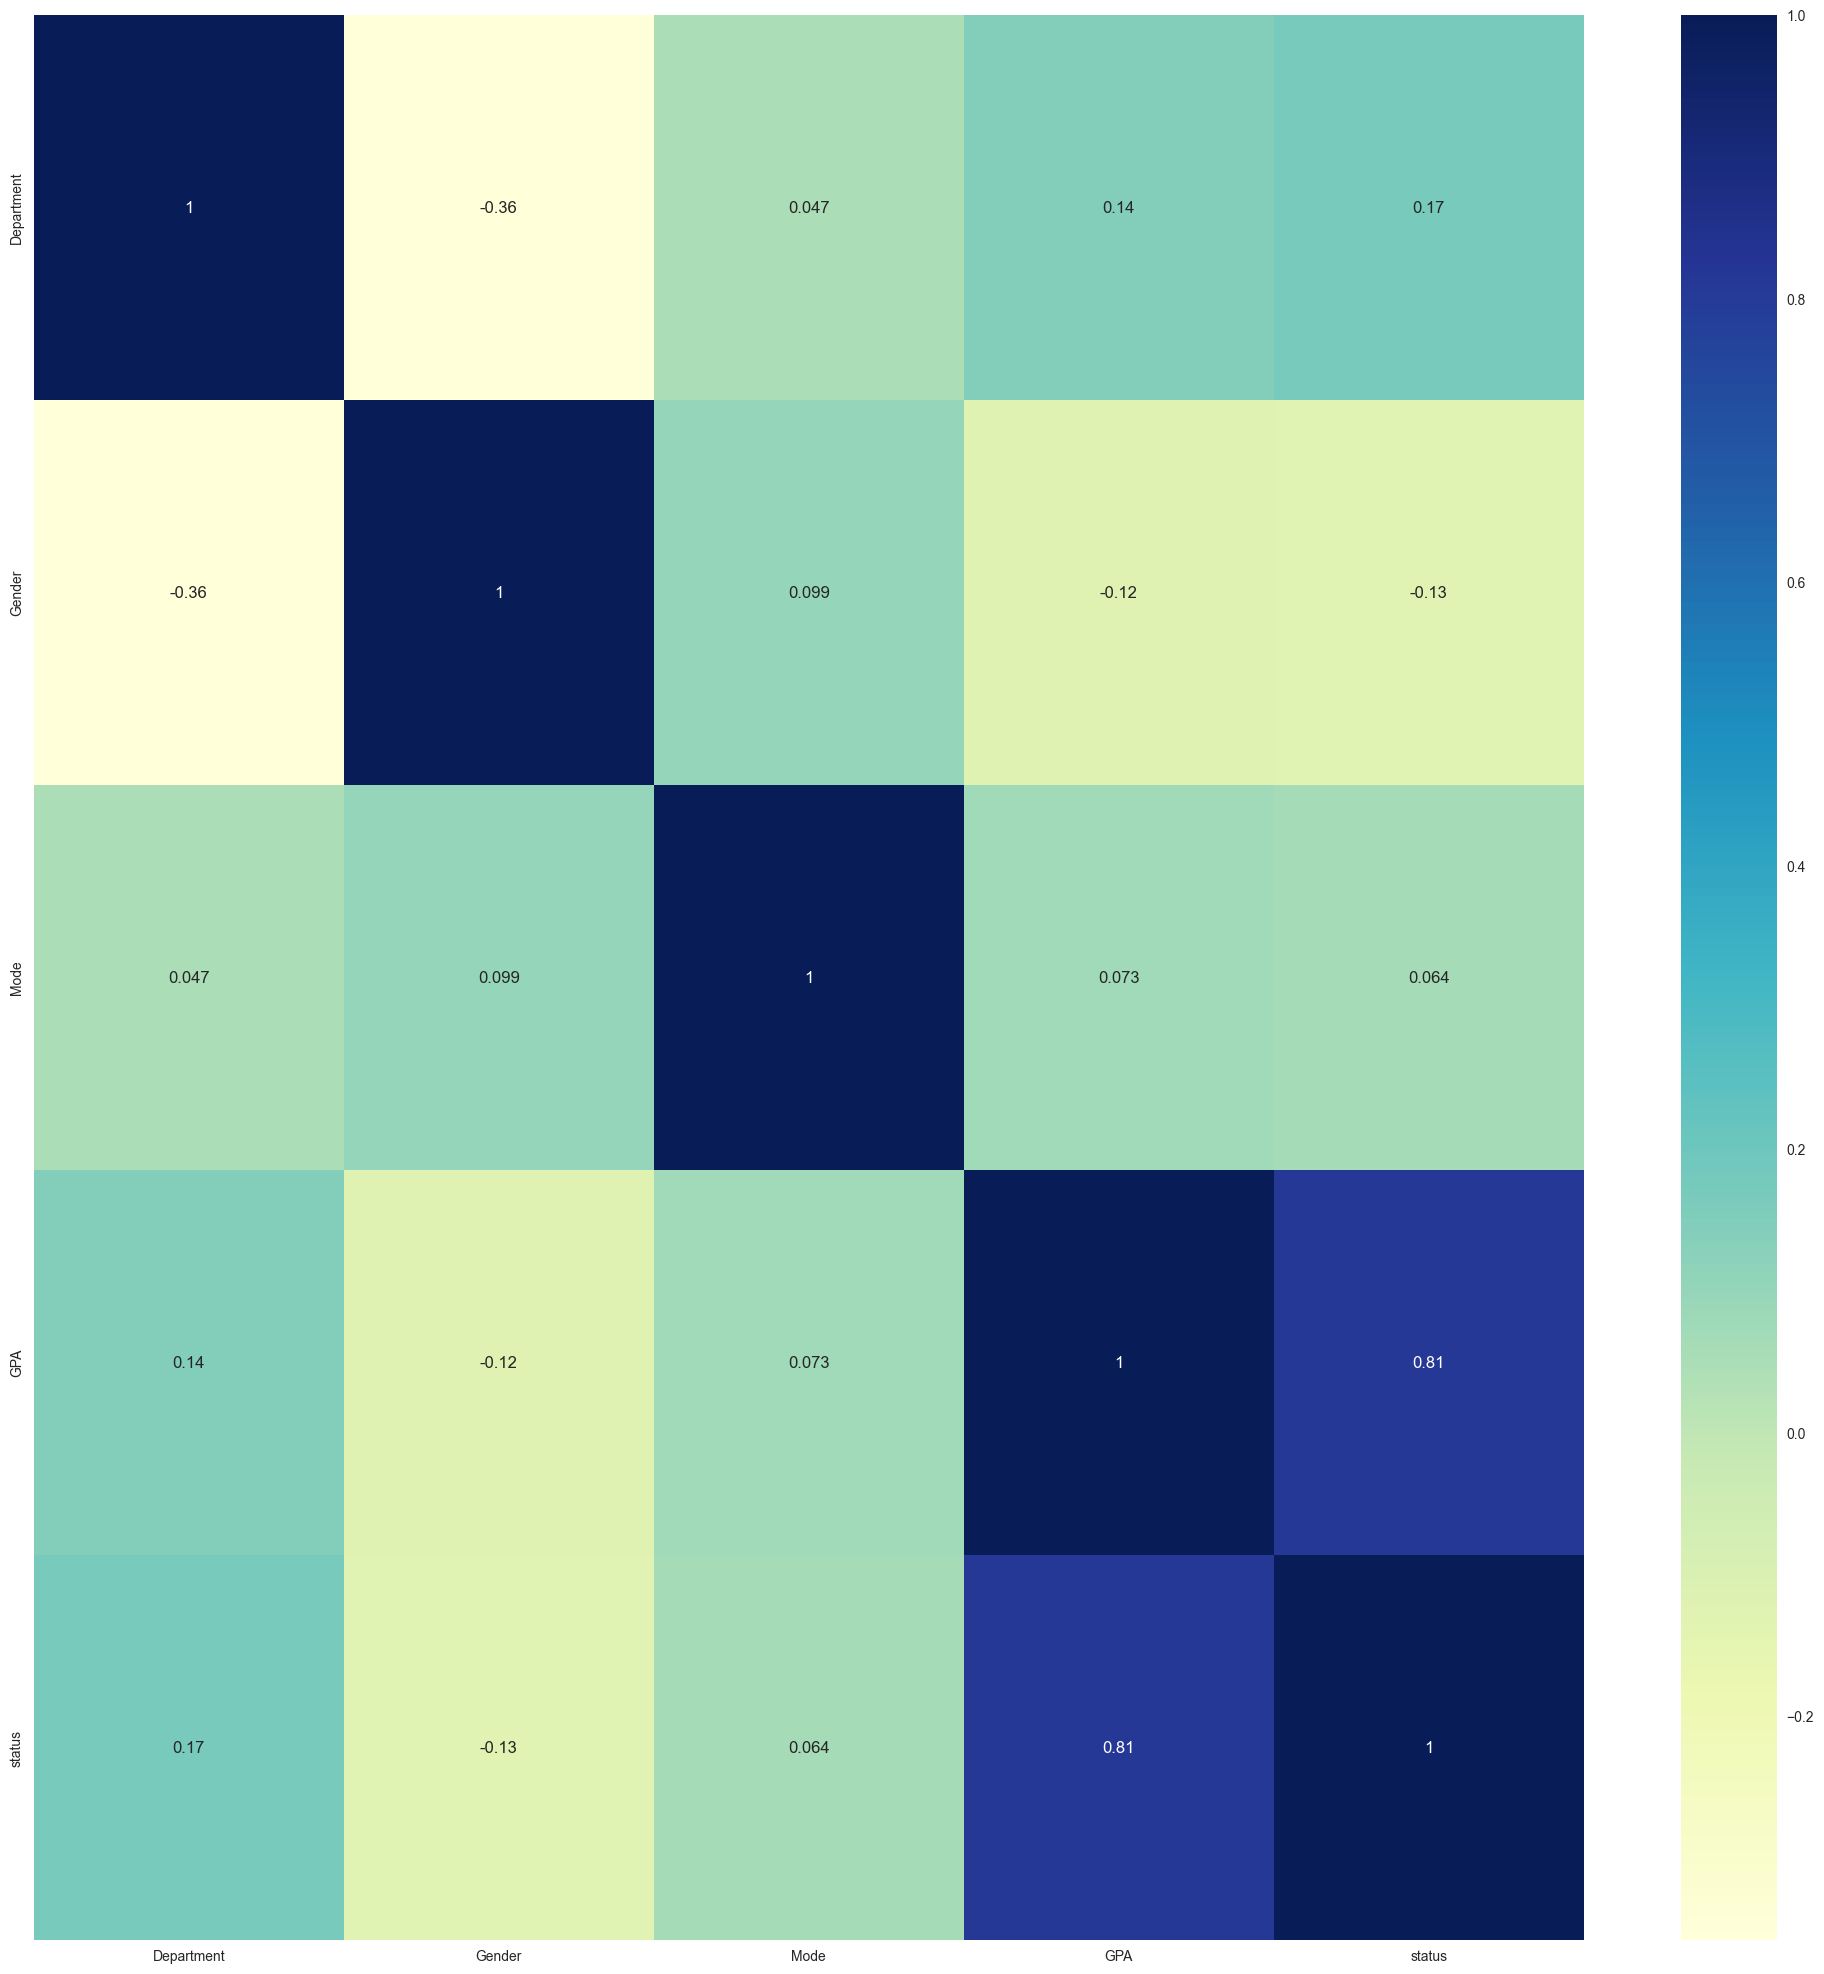

In [132]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

> *Feature Selection*

Reducing features from the dataset.

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = SelectFromModel(DecisionTreeClassifier())
model.fit(X_train, y_train)

model.get_support()
selected_feat= X_train.columns[(model.get_support())]

print("The reduced features (The Features that have greater impact on target) :")
for feature in selected_feat:
  print(feature)
print("The number of Reduced features : {}".format(len(selected_feat)))

The reduced features (The Features that have greater impact on target) :
GPA
The number of Reduced features : 1


In [134]:
df = pd.DataFrame(data=data, columns=selected_feat)
df_target = data['status']
# df1 = pd.concat([df, df_target], ignore_index=True, sort=False)
df = df.join(df_target, lsuffix='_caller', rsuffix='_other')
df.head()

,GPA,status
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [135]:
X = df.drop('status',axis=1)
y = df.status

Comment 3,4 11 

In [136]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# rus = RandomUnderSampler() 
# X, y = rus.fit_resample(X, y)


ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)


# sampler = SMOTE()
# X, y = sampler.fit_resample(X, y)

# data.isnull().sum()

# X = X_ros
# y = y_ros

> Splitting data for Training and Testing

In [137]:
#splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

> Training the models and Evaluating their performance

*Since the target feature is categorical, the Machine learning models that are used to train and predict on this dataset should be of type Classification.*

*The various metrics for evaluating Classification models are*




> Confusion matrix
 *   Accuracy
 *   Recall
 *   Precision
 *   F1_score
 
> Classification Report







In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [139]:
scores_df=pd.DataFrame({'Model':[], 'F1_score':[], 'Accuracy':[]})

### Logistic Regression

*`Logistic Regression` is used for predicting the categorical dependent variable using a given set of independent variables.*

In [140]:
# logistic regression
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(C=0.1, max_iter=250, class_weight=None, random_state=42)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(lr).__name__,f1_score(y_test, y_pred)))


scores_df = pd.concat([scores_df, pd.DataFrame({'Model': [type(lr).__name__],
                                                'F1_score': [f1_score(y_test, y_pred)],
                                                'Accuracy': [accuracy_score(y_test, y_pred)]})],
                      ignore_index=True)


              precision    recall  f1-score   support

           0       0.92      0.89      0.91       555
           1       0.89      0.93      0.91       541

    accuracy                           0.91      1096
   macro avg       0.91      0.91      0.91      1096
weighted avg       0.91      0.91      0.91      1096

LogisticRegression's F1_Score :0.9067873303167421


The Accuracy of LogisticRegression is 0.72 and F1_score is 0.82

### Naive Bayes ( BernoulliNB )

*`Naïve Bayes` algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.*

In [141]:
#naive bayes
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(nb).__name__,f1_score(y_test, y_pred)))


scores_df = pd.concat([scores_df, pd.DataFrame({'Model': [type(lr).__name__],
                                                'F1_score': [f1_score(y_test, y_pred)],
                                                'Accuracy': [accuracy_score(y_test, y_pred)]})],
                      ignore_index=True)


              precision    recall  f1-score   support

           0       1.00      0.03      0.06       555
           1       0.50      1.00      0.67       541

    accuracy                           0.51      1096
   macro avg       0.75      0.51      0.36      1096
weighted avg       0.75      0.51      0.36      1096

BernoulliNB's F1_Score :0.6674892041949414


The Accuracy of Bernoulli Naive Bayes Classifier is 0.75 and F1_score is 0.84

### K Nearest Neighbour

*`K-NN` algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.*

In [142]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, algorithm='auto')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(knn).__name__,f1_score(y_test, y_pred)))

scores_df = pd.concat([scores_df, pd.DataFrame({'Model': [type(lr).__name__],
                                                'F1_score': [f1_score(y_test, y_pred)],
                                                'Accuracy': [accuracy_score(y_test, y_pred)]})],
                      ignore_index=True)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       555
           1       0.87      0.98      0.92       541

    accuracy                           0.92      1096
   macro avg       0.92      0.92      0.92      1096
weighted avg       0.92      0.92      0.92      1096

KNeighborsClassifier's F1_Score :0.9201388888888888


The Accuracy of KNN Classifier is 0.68 and F1_score is 0.81

### Decision Tree

*`Decision Tree` is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.*

In [143]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(dt).__name__,f1_score(y_test, y_pred)))

scores_df = pd.concat([scores_df, pd.DataFrame({'Model': [type(lr).__name__],
                                                'F1_score': [f1_score(y_test, y_pred)],
                                                'Accuracy': [accuracy_score(y_test, y_pred)]})],
                      ignore_index=True)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       555
           1       0.87      0.98      0.92       541

    accuracy                           0.92      1096
   macro avg       0.92      0.92      0.92      1096
weighted avg       0.92      0.92      0.92      1096

DecisionTreeClassifier's F1_Score :0.9201388888888888


The Accuracy of Decision Tree Classifier is 0.68 and F1_score is 0.77

### Support Vector Machine

*`SVM` algorithm creates the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.*

In [144]:
# svm

from sklearn.svm import SVC

svm = SVC(C=0.001)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(svm).__name__,f1_score(y_test, y_pred)))

scores_df = pd.concat([scores_df, pd.DataFrame({'Model': [type(lr).__name__],
                                                'F1_score': [f1_score(y_test, y_pred)],
                                                'Accuracy': [accuracy_score(y_test, y_pred)]})],
                      ignore_index=True)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       555
           1       0.87      0.98      0.92       541

    accuracy                           0.92      1096
   macro avg       0.92      0.92      0.92      1096
weighted avg       0.92      0.92      0.92      1096

SVC's F1_Score :0.9201388888888888


The Accuracy of Support Vector Machine Classifier is 0.71 and F1_score is 0.83

### Random Forest Classifier

*`Random Forest` is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.*

In [145]:
#random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=13, criterion='gini', max_depth=10)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(rf).__name__,f1_score(y_test, y_pred)))

scores_df = pd.concat([scores_df, pd.DataFrame({'Model': [type(lr).__name__],
                                                'F1_score': [f1_score(y_test, y_pred)],
                                                'Accuracy': [accuracy_score(y_test, y_pred)]})],
                      ignore_index=True)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       555
           1       0.87      0.98      0.92       541

    accuracy                           0.92      1096
   macro avg       0.92      0.92      0.92      1096
weighted avg       0.92      0.92      0.92      1096

RandomForestClassifier's F1_Score :0.9201388888888888


The Accuracy of Random Forest Classifier is 0.75 and F1_score is 0.83

*Here we are using `Yellowbrick` for visualization of model prediction*

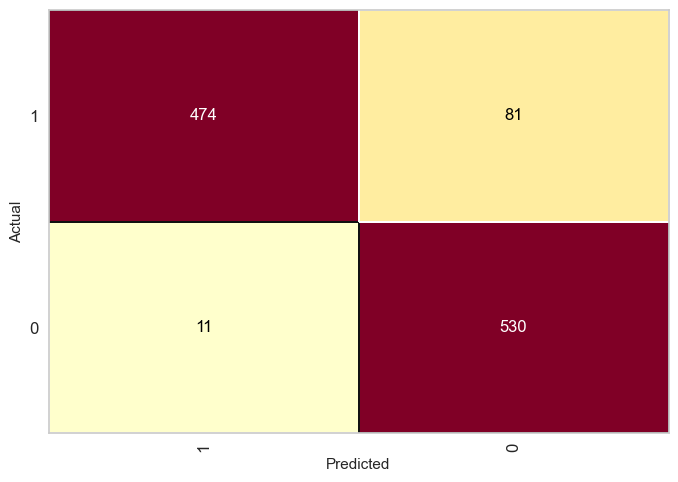

In [146]:
classes = [1,0]
from yellowbrick.classifier import ConfusionMatrix
visualizer = ConfusionMatrix(rf, classes=classes, support=True) 
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

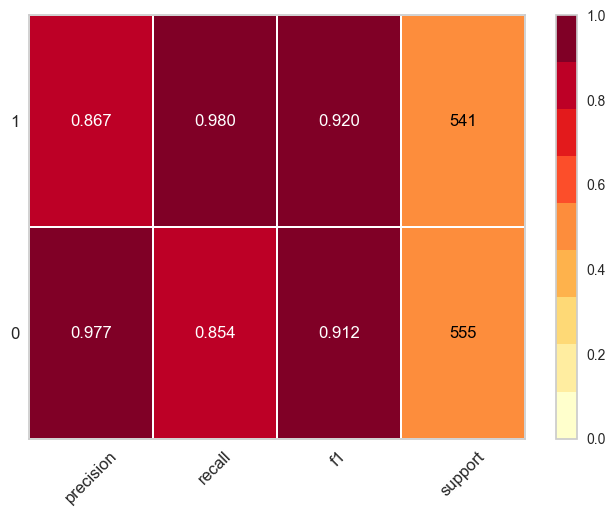

In [147]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf, classes=classes, support=True) 
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
plt.show()

Text(0.5, 1.0, 'Predicted against Actual plot')

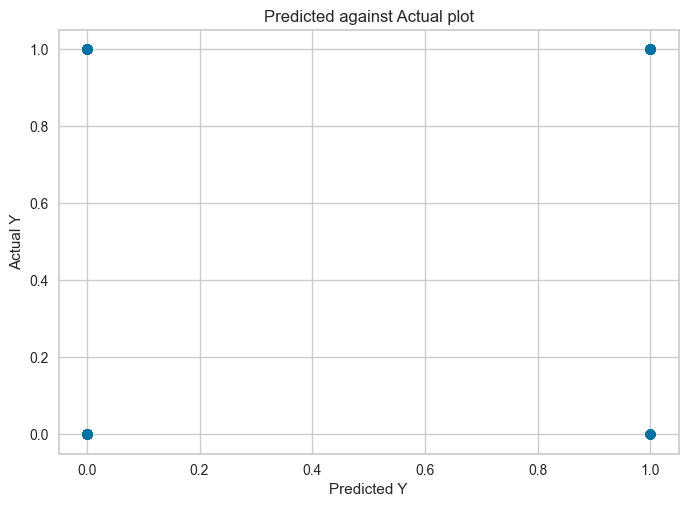

In [148]:
plt.scatter(y_test,y_pred)
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")
plt.title("Predicted against Actual plot")

### XGBOOST

In [149]:
# ! pip install xgboost

In [150]:
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)
num_cols = X.select_dtypes(include="number").columns

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
    ]
)

X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=50
)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,round(accuracy_score(y_test, y_pred),2)))
print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

scores_df = pd.concat([scores_df, pd.DataFrame({'Model': [type(lr).__name__],
                                                'F1_score': [f1_score(y_test, y_pred)],
                                                'Accuracy': [accuracy_score(y_test, y_pred)]})],
                      ignore_index=True)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       685
           1       0.88      0.97      0.92       684

    accuracy                           0.92      1369
   macro avg       0.92      0.92      0.92      1369
weighted avg       0.92      0.92      0.92      1369

XGBClassifier's F1_Score :0.9207232267037552


The Accuracy of XGBOOST Classifier is 0.72 and F1_score is 0.81

Since the data is unbalanced F1_score is considered superior to model accuracy in determining the better ML algorithm.

Therefore, the Accuracy and F1_Score of different models stated above are

In [151]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.906787,0.906022
1,LogisticRegression,0.667489,0.508212
2,LogisticRegression,0.920139,0.916058
3,LogisticRegression,0.920139,0.916058
4,LogisticRegression,0.920139,0.916058
5,LogisticRegression,0.920139,0.916058
6,LogisticRegression,0.920723,0.916728


In [152]:
from joblib import Parallel, delayed
import joblib

rf.feature_names = list(selected_feat)
  
joblib.dump(rf, 'model.pkl')
joblib.dump(le, 'encoder.pkl')

['encoder.pkl']

In [153]:
import joblib

joblib.dump(LogisticRegression, 'Student_Graduation_prediction_model.pkl')

['Student_Graduation_prediction_model.pkl']

In [154]:
joblib.dump(sc, 'StandardScaler.pkl')

NameError: name 'sc' is not defined

In [ ]:
model = joblib.load('Student_Graduation_prediction_model.pkl')

predictions = model.predict(sc.transform([[

    2.0

]]))

prediction_label = "Will Graduate" if predictions[0] == 1 else "Dropout"
print("Predicted status:", prediction_label)

## Conclusion


---


Among the above classifiers `Random Forest Classifier` performs well on this dataset. It has higher values in terms of both Accuracy - 80% and F1 Score - 0.84(approximately)